# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

_________

According to the exercise, is calculated the amount of missing values per feature, and kind of features is.

In [5]:
aux = pd.DataFrame()
aux['missing_values'] = df.isnull().sum()
aux['type'] = df.dtypes

aux[aux.missing_values != 0]

,missing_values,type
normalized_losses,41,float64
num_doors,2,object
bore,4,float64
stroke,4,float64
horsepower,2,float64
peak_rpm,2,float64
price,4,float64


So, there is 7 features with missing values. Let's evaluate each type. 

- #### object 
The categorical features (e.g. *num_doors*) cannot be fill with the mean or median, so requires an additional analysis.

In [6]:
df.loc[df.num_doors.isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [7]:
df.num_doors.describe()

count      203
unique       2
top       four
freq       114
Name: num_doors, dtype: object

Both cars are *sedan*. That make us think on four (4) doors for fill the missing values. On the other hand, four (4) doors is the most common number of doors in the dataset.

In [8]:
df.num_doors.fillna('four', inplace=True)

- #### float64 

What if we just drop the missing values?

In [9]:
df.shape, df.dropna().shape

((205, 26), (160, 26))

Is not a good idea.. we will lose 45 registers.. of 250 in total (~22%).

To fill them, let's use the average for the all features with missing values. This way to fill the missing values is given by design considerations.

In [10]:
df.normalized_losses.fillna(df.normalized_losses.mean(), inplace=True)
df.bore.fillna(df.bore.mean(), inplace=True)
df.stroke.fillna(df.stroke.mean(), inplace=True)
df.horsepower.fillna(df.horsepower.mean(), inplace=True)
df.peak_rpm.fillna(df.peak_rpm.mean(), inplace=True)
df.price.fillna(df.price.mean(), inplace=True)

In [11]:
# Double check if there are more missing values

df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the numerical features

In [12]:
# Creating the dataset for features 'X', and target "y"

X = df.drop(['price'], axis = 1)
y = df['price']

In [13]:
# drop these columns as "object" which are the categorical features

X_num = X.drop(obj_df.columns, axis = 1)
X_num.dtypes

symboling              int64
normalized_losses    float64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
dtype: object

In [14]:
# Split of dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state=6)

In [15]:
# training a Random Forest

from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(random_state=6, n_jobs=-1)
tree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [16]:
# Prediction 

y_pred = tree.predict(X_test)

In [17]:
# Metrics to evaluate the performance

from sklearn import metrics

r_num = metrics.mean_squared_error( y_test , y_pred ) * 0.5
r_num

3336335.193338647

In [18]:
results_m = []
results_rmse = []
results_features = []

results_m.append('Numerical')
results_rmse.append(r_num)
results_features.append(X_num.shape[1])

# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

In [19]:
# Dummies creation over the features

X_dummies = pd.get_dummies(X)
X_dummies.shape

(205, 75)

In [20]:
# Split of dataset

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=6)

In [21]:
# training a Random Forest

tree = RandomForestRegressor(random_state=6, n_jobs=-1)
tree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [22]:
# Prediction 

y_pred = tree.predict(X_test)

In [23]:
# Metrics to evaluate the performance

r_dummies = metrics.mean_squared_error( y_test , y_pred ) * 0.5
r_dummies

2629391.452873383

In [24]:
results_m.append('Dummy')
results_rmse.append(r_dummies)
results_features.append(X_dummies.shape[1])

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

__________

For this exercise, will use Categorical Encoding. For more details, click [here](http://contrib.scikit-learn.org/categorical-encoding/)

Due this, will use the methods:

- Binary
- Polynomial Coding

#### Binary

In [25]:
# !pip install category_encoders
import category_encoders as ce

In [26]:
# Creation of the encoder

BinaryEn = ce.BinaryEncoder()
BinaryEn.fit(X)

BinaryEncoder(cols=['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders', 'fuel_system'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       return_df=True, verbose=0)

In [27]:
# Transformation 

X_binary = BinaryEn.transform(X)
X_binary.shape

(205, 48)

In [28]:
# Split of dataset

X_train, X_test, y_train, y_test = train_test_split(X_binary, y, random_state=6)

In [29]:
# training a Random Forest

tree = RandomForestRegressor(random_state=6, n_jobs=-1)
tree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [30]:
# Prediction 

y_pred = tree.predict(X_test)

In [31]:
# Metrics to evaluate the performance

r_binary = metrics.mean_squared_error( y_test , y_pred ) * 0.5
r_binary

3081927.0979268793

In [32]:
results_m.append('Binary')
results_rmse.append(r_binary)
results_features.append(X_binary.shape[1])

#### Polynomial Coding

In [33]:
# Creation of the encoder

PolynomialEn = ce.PolynomialEncoder()
PolynomialEn.fit(X)

PolynomialEncoder(cols=['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders', 'fuel_system'],
         drop_invariant=False, handle_unknown='impute',
         impute_missing=True,
         mapping=[{'col': 'make', 'mapping':      .Linear  .Quadratic        .Cubic        ^4        ^5        ^6  \
1  -0.352854    0.415842 -4.289430e-01  0.404689 -0.355009  0.291740
2  -0.319249    0.297030 -1.838327e-01  0.019271  0.152147 -0.291740
3  -0.285644    0.190099  1.228105e-16 -0.192709...9786  0.061546  0.017070
0  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000}],
         return_df=True, verbose=0)

In [34]:
# Transformation

X_pol = PolynomialEn.transform(X)
X_pol.shape

(205, 66)

In [35]:
# Split of dataset

X_train, X_test, y_train, y_test = train_test_split(X_pol, y, random_state=6)

In [36]:
# training a Random Forest

tree = RandomForestRegressor(random_state=6, n_jobs=-1)
tree.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=6, verbose=0, warm_start=False)

In [37]:
# Prediction 

y_pred = tree.predict(X_test)

In [38]:
# Metrics to evaluate the performance

r_pol = metrics.mean_squared_error( y_test , y_pred ) * 0.5
r_pol

2410357.2575453552

In [39]:
results_m.append('Polynomial')
results_rmse.append(r_pol)
results_features.append(X_pol.shape[1])

## Summary

In [40]:
results = pd.DataFrame([results_m, results_rmse, results_features]).T
results.rename(columns = {0 : 'Method', 1 : 'RMSE', 2 : 'n_Features'}, inplace = True)

results['RMSE'] = results['RMSE'].astype('int64')
results['n_Features'] = results['n_Features'].astype('int64')

results

,Method,RMSE,n_Features
0,Numerical,3336335,15
1,Dummy,2629391,75
2,Binary,3081927,48
3,Polynomial,2410357,66


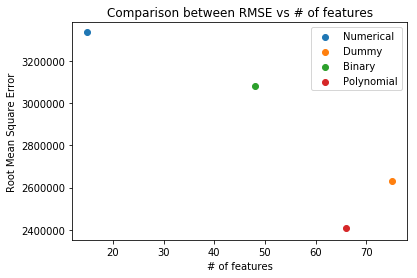

In [42]:
import matplotlib.pyplot as plt

for i in range(0, results.shape[0]):
    plt.scatter(y = results.RMSE[i], x = results.n_Features[i])
    
plt.xlabel('# of features')
plt.ylabel('Root Mean Square Error')
plt.legend(results_m)
plt.title('Comparison between RMSE vs # of features')
plt.show()

According the graphic above, must be choosen the **Polynomial** encode for this exercise because it have the lower root mean square error with the less amount of features (what implies less computional efforts).